In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.ensemble import GradientBoostingClassifier as GBC

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,plot_confusion_matrix

In [2]:
red = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',sep=';')
white = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv',sep=';')

In [3]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
# 데이터 전처리 
# 불필요한 변수 제거
# 일반적으로 와인 퀄리티가 와인의 종류를 구분하지 않기 때문에 quality 변수 제거
red = red.drop('quality',axis = 1)
white = white.drop('quality',axis = 1)

In [6]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [7]:
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [8]:
# 결측치 처리 (red,white)
red.isnull().sum() # 결측치 없음
white.isnull().sum() # 결측치 없음

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

In [9]:
# 이상치 처리
# 와인 종류별로 데이터 분포가 다르기 때문에 이상치 역시 따로 처리해야 함
# Boxplot을 활용한 이상치 확인

def boxplot_vis(data,target_name):
    plt.figure(figsize=(30,30))
    for col_idx in range(len(data.columns)):
        #6행 2열 서브플롯에 각 feature 박스플롯 시각화
        plt.subplot(6,2,col_idx+1)
        #flierprops : 빨간색 다이아몬드 모양으로 아웃라이어 시각화
        plt.boxplot(data[data.columns[col_idx]],flierprops=dict(markerfacecolor = 'r',marker='D'))
        # 그래프 타이틀 : feature name
        plt.title("Feature"+"("+target_name+"):"+data.columns[col_idx],fontsize = 20)
    plt.savefig('./figure/boxplot_'+target_name+'.png')
    plt.show()

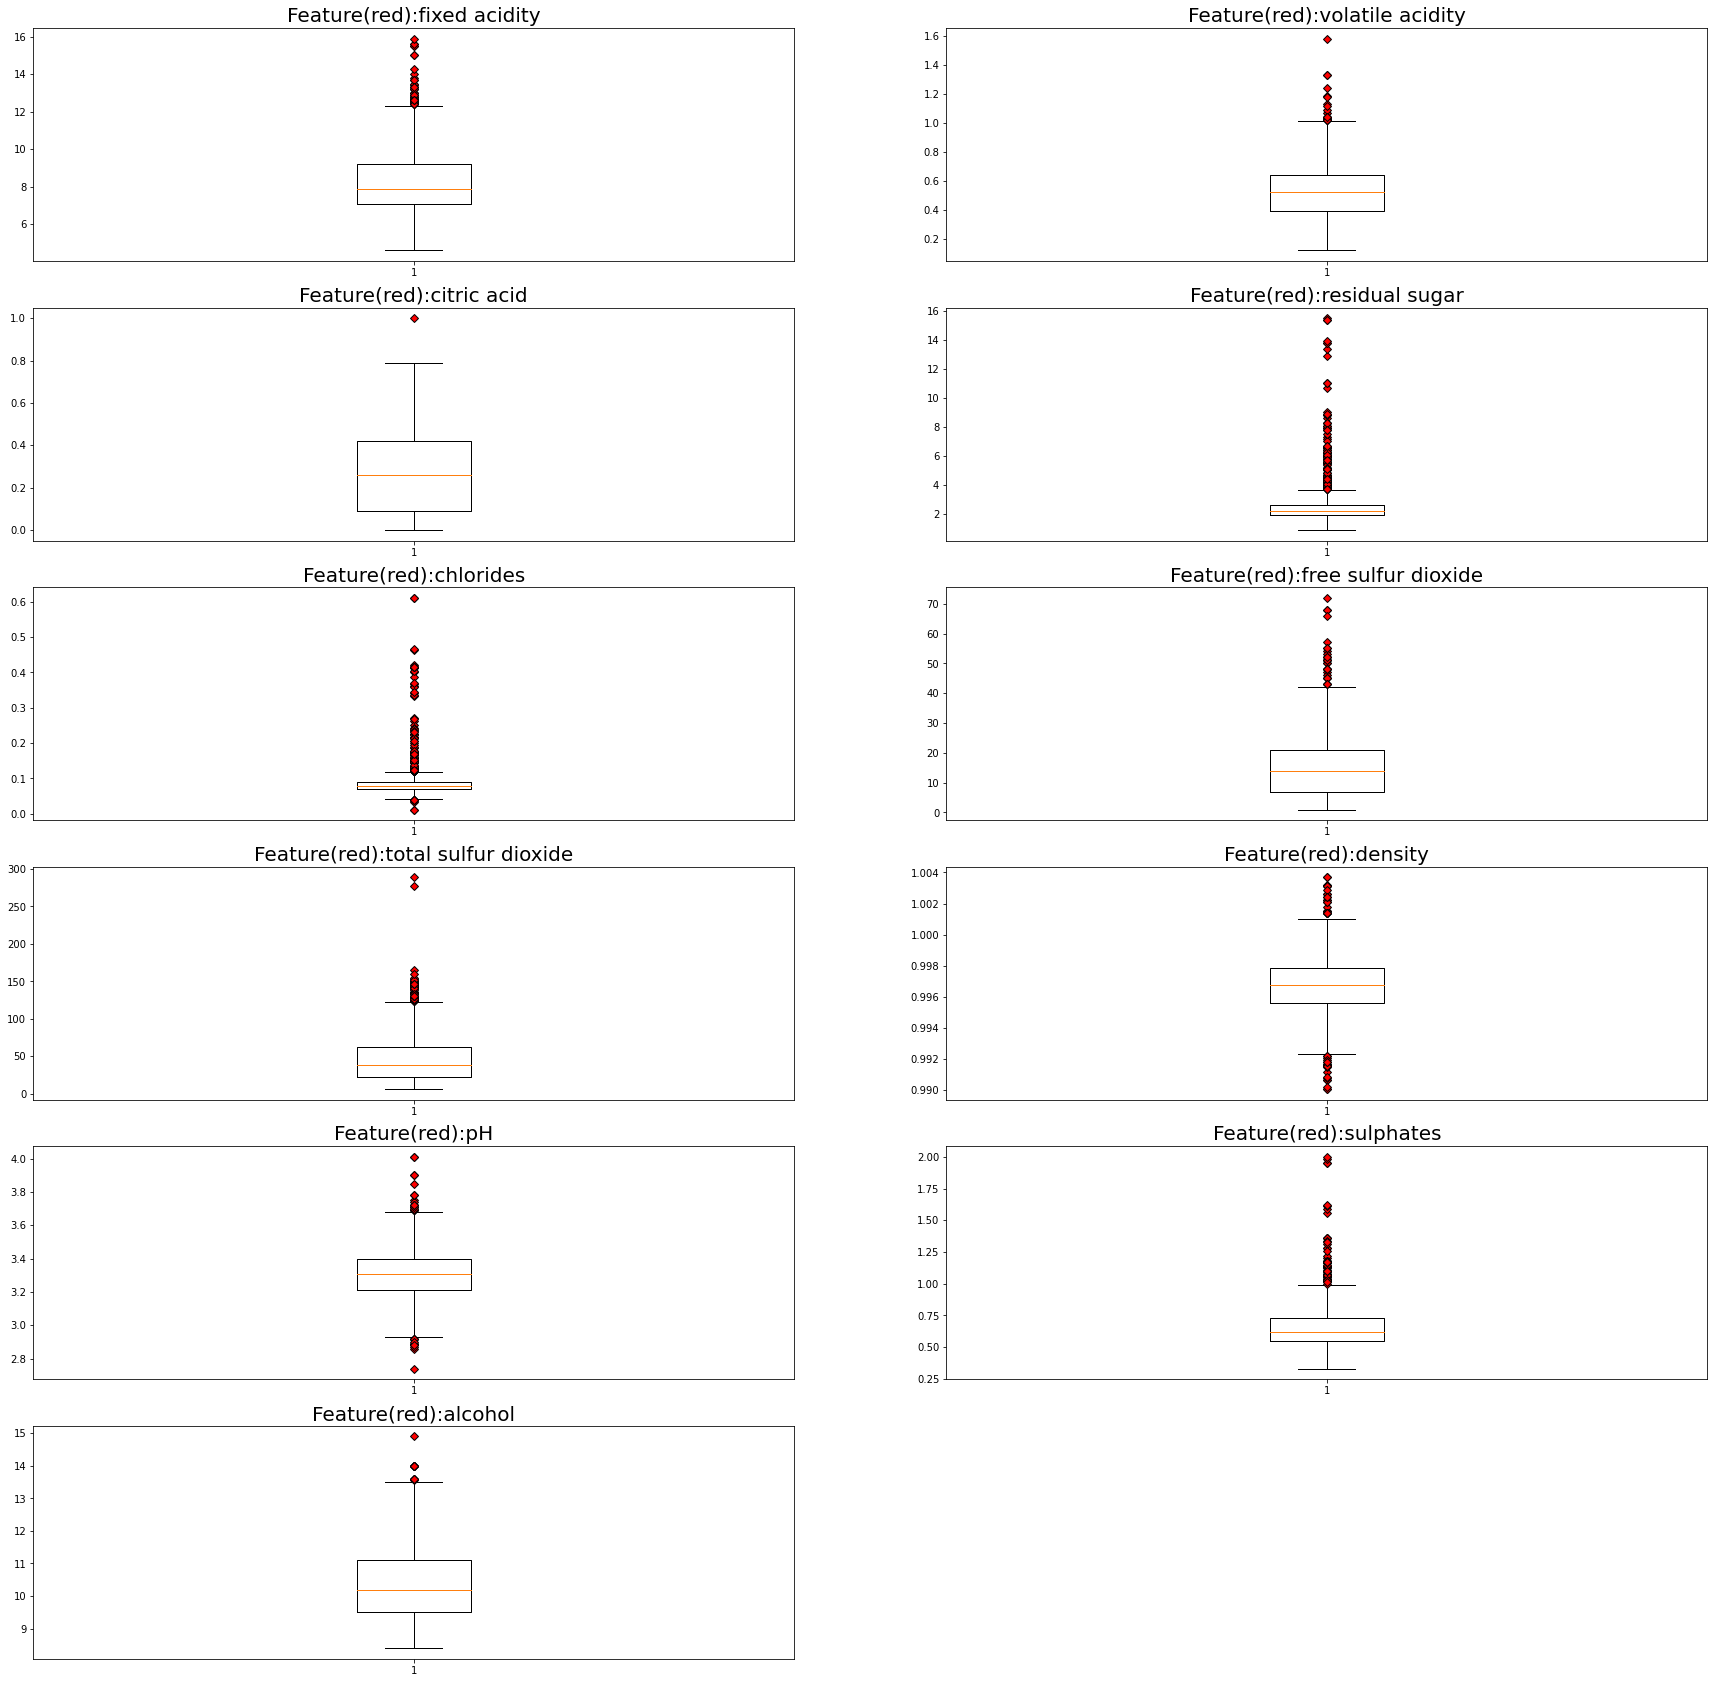

In [10]:
# 레드와인 이상치 처리 
boxplot_vis(red,'red')

In [11]:
def remove_outlier(input_data):
    q1 = input_data.quantile(0.25) # 제 1사분위 수
    q3 = input_data.quantile(0.75) # 제 3사분위 수
    iqr = q3-q1 # IQR(Interquartile range) 계산
    minimum = q1 - (iqr *1.5) # IQR 최솟값
    maximum = q3 + (iqr *1.5) # IQR 최댓값
    # IQR 범위 내에 있는 데이터만 산출(IQR 범위 밖의 데이터는 이상치)
    df_removed_outer = input_data[(minimum < input_data)&(input_data<maximum)]
    return df_removed_outer

In [12]:
# 이상치 제거한 데이터 셋
red_prep =remove_outlier(red)

In [13]:
# 목표 변수 할당
red_prep['target'] = 0

In [14]:
# 결측치(이상치 처리된 데이터 확인)
red_prep.isnull().sum()

fixed acidity            49
volatile acidity         19
citric acid               1
residual sugar          155
chlorides               112
free sulfur dioxide      33
total sulfur dioxide     58
density                  45
pH                       35
sulphates                59
alcohol                  14
target                    0
dtype: int64

In [15]:
# 이상치 포함 데이터(이상치 처리 후 NaN) 삭제
red_prep.dropna(axis=0,how='any',inplace=True)
print(f'이상치 포함된 데이터 비율 : {round((len(red)-len(red_prep))*100/len(red),2)}%')

이상치 포함된 데이터 비율 : 25.58%


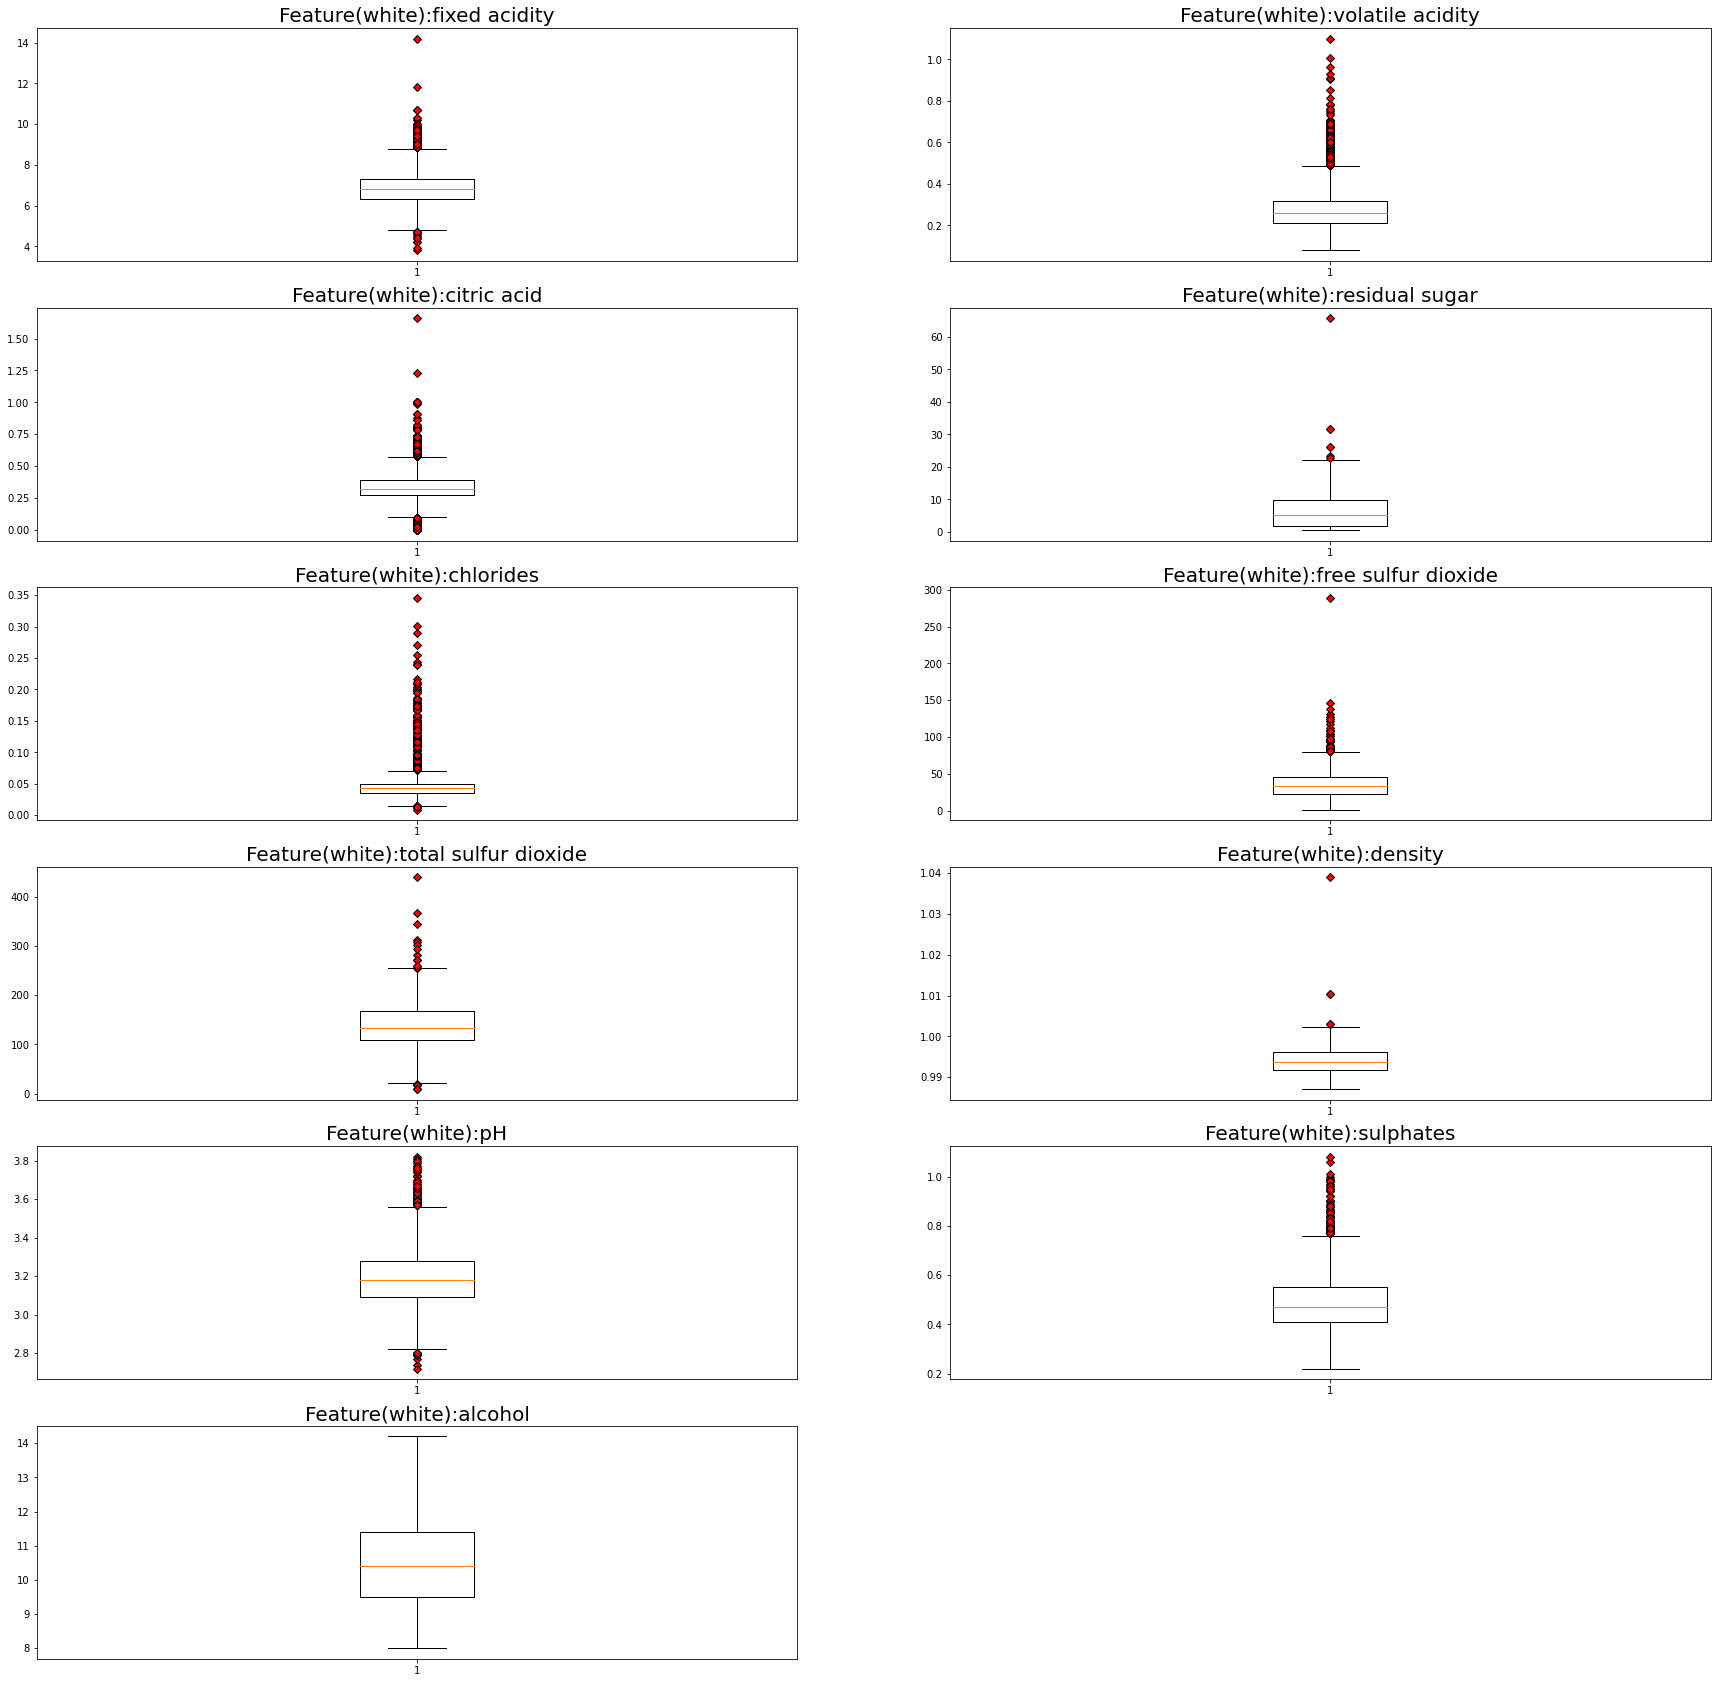

In [16]:
# 화이트 와인 이상치 처리
boxplot_vis(white,'white')

In [17]:
# 이상치 제거한 데이터 셋
white_prep =remove_outlier(white)

In [18]:
# 목표 변수 할당
white_prep['target'] = 1

In [19]:
# 결측치(이상치 처리된 데이터 확인)
white_prep.isnull().sum()

fixed acidity           146
volatile acidity        186
citric acid             270
residual sugar            7
chlorides               208
free sulfur dioxide      50
total sulfur dioxide     19
density                   5
pH                       75
sulphates               124
alcohol                   0
target                    0
dtype: int64

In [20]:
# 이상치 포함 데이터(이상치 처리 후 NaN) 삭제
white_prep.dropna(axis=0,how='any',inplace=True)
print(f'이상치 포함된 데이터 비율 : {round((len(white)-len(white_prep))*100/len(white),2)}%')

이상치 포함된 데이터 비율 : 18.37%


In [21]:
# 데이터 저장
# 데이터셋 저장
red_prep.to_csv('red_prep.csv')
white_prep.to_csv('white_prep.csv') 

In [22]:
# 데이터 병합
# 레드 와인,화이트 와인 데이터 셋 병합
df = pd.concat([red_prep,white_prep],axis=0)

In [23]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,1
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,1


In [24]:
df.to_csv('wine_combined.csv')

In [25]:
#화이트 와인이 레드 와인보다 약 3.5배 더 많음
df.target.value_counts(normalize=True)

1    0.770625
0    0.229375
Name: target, dtype: float64

In [26]:
x=df[df.columns.difference(['target'])]

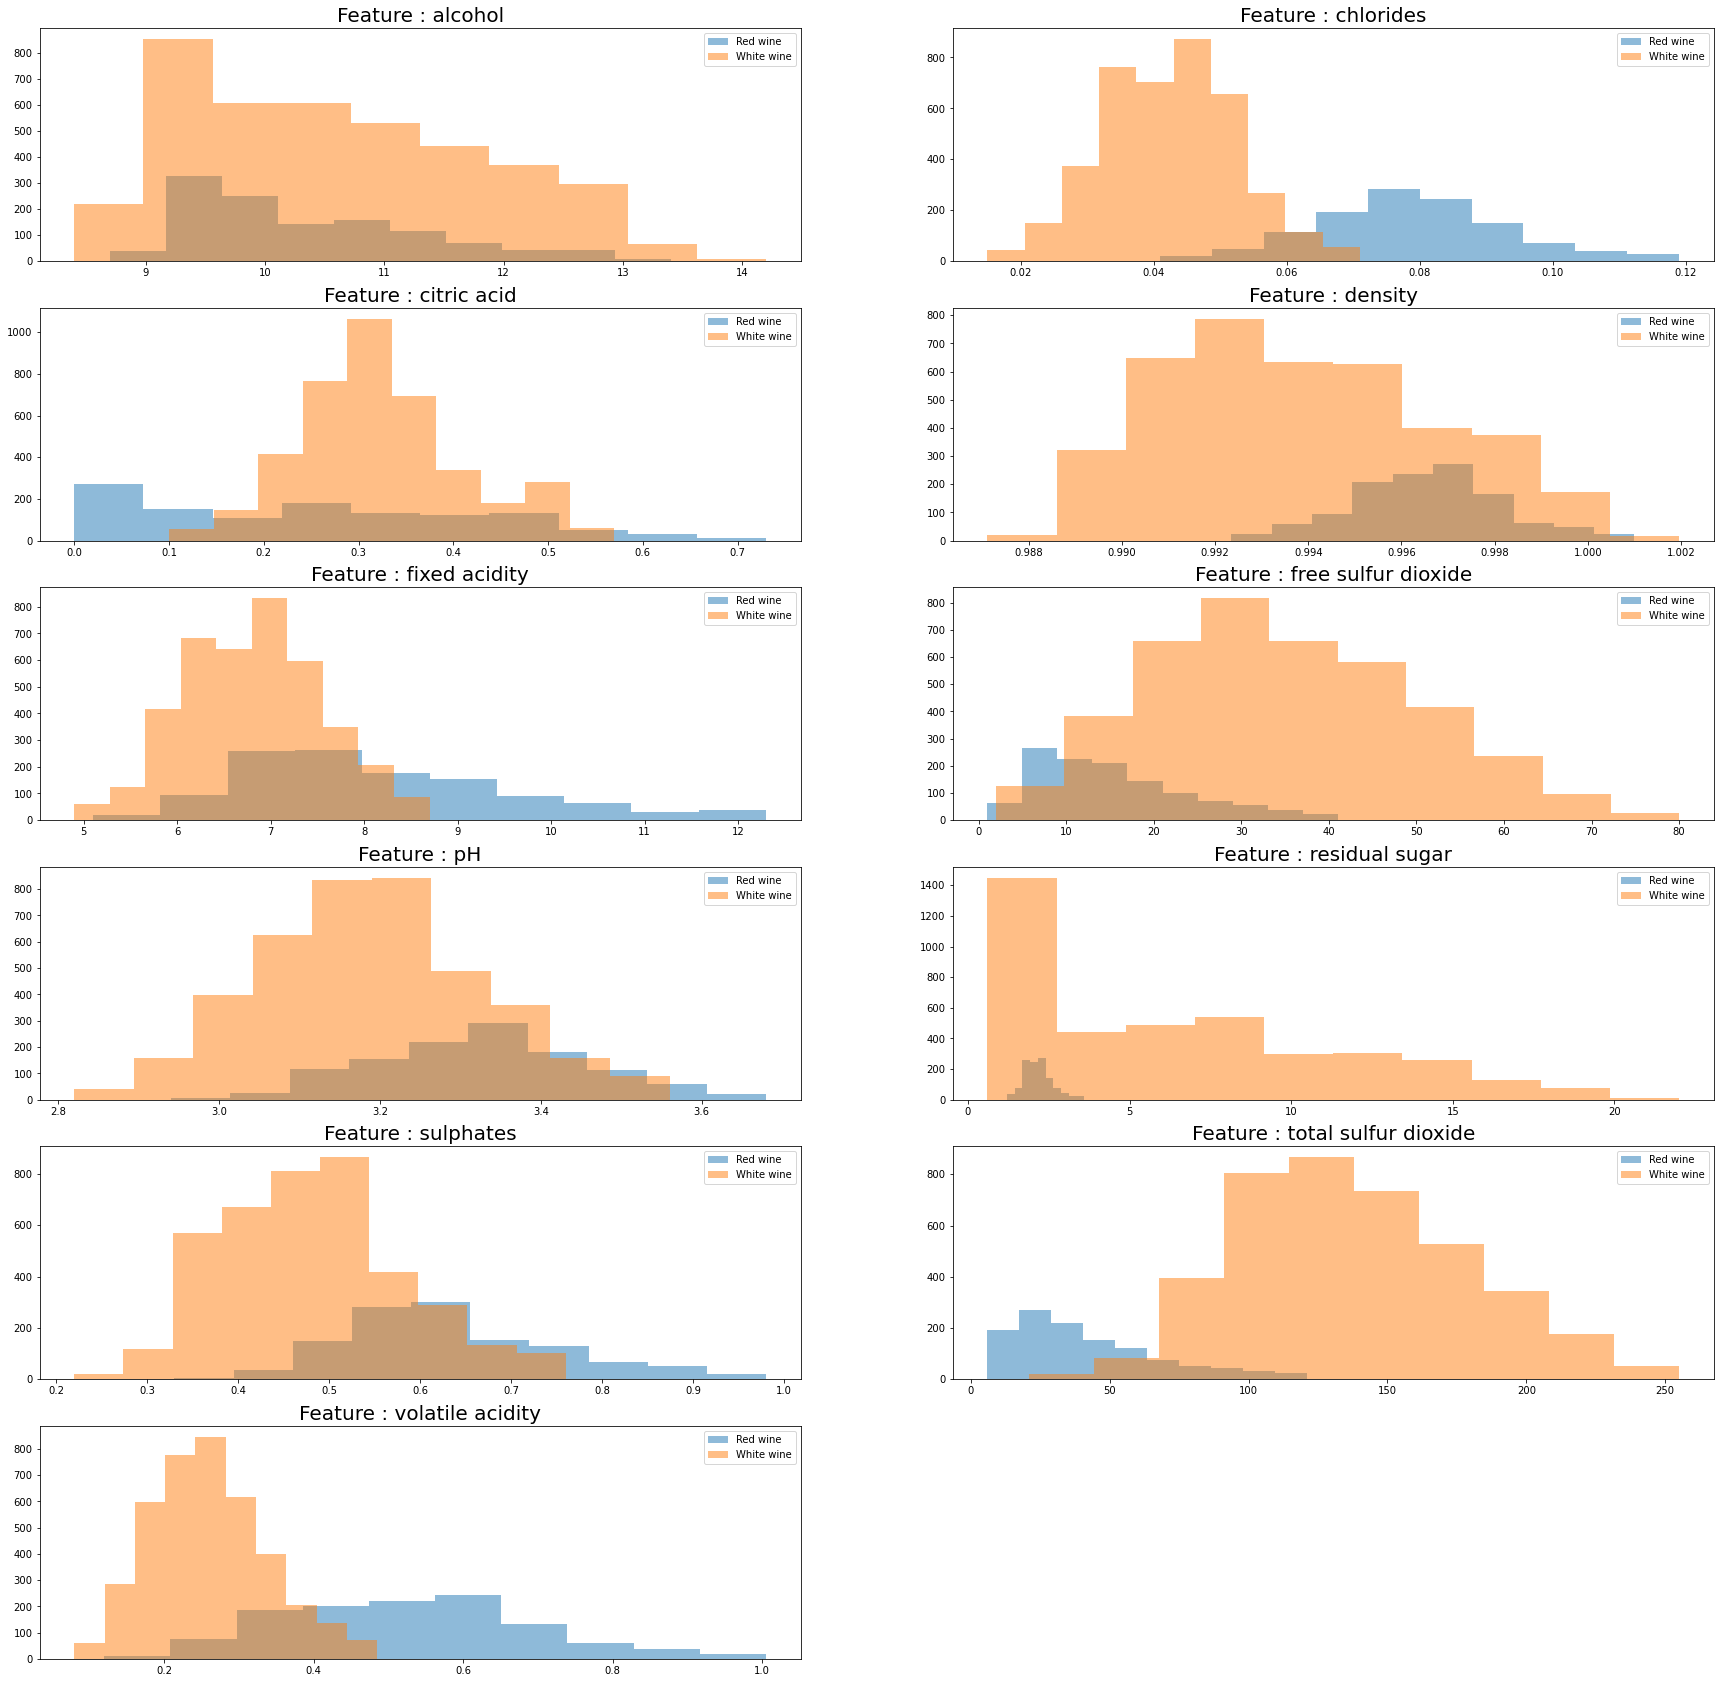

In [27]:
# 설명 변수명 리스트
feature_name = x.columns
plt.figure(figsize=(30,30))
for col_idx in range(len(feature_name)):
    plt.subplot(6,2,col_idx+1)
    plt.hist(df[df['target']==0][feature_name[col_idx]],label="Red wine",alpha=0.5)
    plt.hist(df[df['target']==1][feature_name[col_idx]],label="White wine",alpha=0.5)
    plt.legend()
    plt.title("Feature : "+feature_name[col_idx],fontsize = 20)
plt.savefig('./figure/relationship.png')
plt.show()

In [28]:
# 해석
# alcohol 값에 따른 와인 분류 추이가 비슷한 것으로 보아 alcohol 변수가 클래스를 구분짓는 중료 변수는 아닌 것으로 보임
# 이외에 대부분의 변수는 설명 변수 별로 데이터 분포가 상대적으로 상이한 것으로 보아 와인을 분류하는 데 중요한 변수인 것을 보임

In [29]:
# 데이터 스케일일
# 표준 스케일러(평균 0,분산 1)
scaler = StandardScaler()
# 목표변수 분리
y = df['target']
# 설명변수 데이터 스케일링
x_scaled = scaler.fit_transform(x)

In [30]:
#데이터 분리
# 학습,테스트 데이터 셋 7:3 비율로 분리
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=123)

In [31]:
#훈련 데이터 내 와인별 비율
y_train.value_counts(normalize = True)

1    0.767006
0    0.232994
Name: target, dtype: float64

In [32]:
#테스트 데이터 내 와인별 비율
y_test.value_counts(normalize = True)

1    0.779062
0    0.220938
Name: target, dtype: float64

In [33]:
# Classifier 모델링 함수 
def modeling_uncustomized(algorithm,x_train,y_train,x_test,y_test):
    uncustomized = algorithm(random_state=12345)
    uncustomized.fit(x_train,y_train)
    train_score_before = uncustomized.score(x_train,y_train).round(3)
    print(f'학습 데이터셋 정확도 : {train_score_before}')
    test_score_before = uncustomized.score(x_test,y_test).round(3)
    print(f'test 데이터셋 정확도 : {test_score_before}')
    return train_score_before,test_score_before

In [34]:
algorithm =RFC 
algorithm_name ='rfc'

In [35]:
# 기본 모델 학습
train_acc_before,test_acc_before = modeling_uncustomized(algorithm,x_train,y_train,x_test,y_test)

학습 데이터셋 정확도 : 1.0
test 데이터셋 정확도 : 0.999


In [36]:
def optimi_visualization(algorithm_name,x_values,train_score,test_score,xlabel,filename):
    plt.plot(x_values,train_score,linestyle='-',label = 'train score')
    plt.plot(x_values,test_score,linestyle='-',label = 'test score')
    plt.ylabel('Accuracy(%)')
    plt.xlabel(xlabel)
    plt.legend()
    plt.savefig('./figure'+algorithm_name+'_'+filename+'.png')

In [37]:
def optimi_estimator(algorithm,algorithm_name,x_train,y_train,x_test,y_test,n_estimatior_min,n_estimatior_max):
    train_score = []
    test_score = []
    para_n_tree = [n_tree*5 for n_tree in range(n_estimatior_min,n_estimatior_max)]
    
    for v_n_estimators in para_n_tree:
        model = algorithm(n_estimators = v_n_estimators,random_state=1234)
        model.fit(x_train,y_train)
        train_score.append(model.score(x_train,y_train))
        test_score.append(model.score(x_test,y_test))
    df_score_n = pd.DataFrame({'n_estimators':para_n_tree,'TrainScore':train_score,'TestScore':test_score})
    optimi_visualization(algorithm_name,para_n_tree,train_score,test_score,'The estimator','n_estimator')
    print(round(df_score_n,4))
        

    n_estimators  TrainScore  TestScore
0              5         1.0     0.9961
1             10         1.0     0.9974
2             15         1.0     0.9974
3             20         1.0     0.9981
4             25         1.0     0.9981
5             30         1.0     0.9987
6             35         1.0     0.9987
7             40         1.0     0.9987
8             45         1.0     0.9987
9             50         1.0     0.9987
10            55         1.0     0.9987
11            60         1.0     0.9987
12            65         1.0     0.9987
13            70         1.0     0.9987
14            75         1.0     0.9987
15            80         1.0     0.9987
16            85         1.0     0.9987
17            90         1.0     0.9987
18            95         1.0     0.9987
19           100         1.0     0.9987
20           105         1.0     0.9987
21           110         1.0     0.9987
22           115         1.0     0.9987
23           120         1.0     0.9987


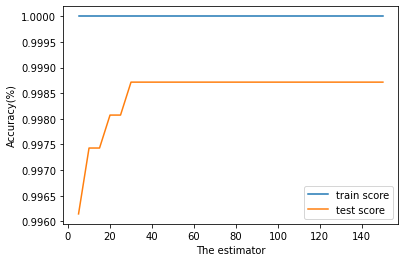

In [38]:
n_estimatior_min = 1
n_estimatior_max =31

optimi_estimator(algorithm,algorithm_name,x_train,y_train,x_test,y_test,n_estimatior_min,n_estimatior_max)

In [39]:
# 해석
# 학습 데이터에서 정확도가 100%에 가깝게 나타난 것으로 보아 
# 과대적합 발생한 것으로 보임
# 트리개수가 적을수록 과대적합 방지가 용이함
# 테스트 데이터셋에서 모델 성능이 증가하다가 감소하기 직전의 트리 개수를 
# 최적의 파라미터로 선정  -->n_estimator = 30

In [40]:
# 2) 모델 최대 깊이 선정
def optimi_maxdepth (algorithm, algorithm_name, x_train, y_train, 
                     x_test, y_test, depth_min, depth_max, n_estimator):
    train_score = []; test_score = []
    para_depth = [depth for depth in range(depth_min, depth_max)]

    for v_max_depth in para_depth:
        # 의사결정나무 모델의 경우 트리 개수를 따로 설정하지 않기 때문에 RFC, GBC와 분리하여 모델링
        if algorithm == DTC:
            model = algorithm(max_depth = v_max_depth,
                              random_state=1234)
        else:
            model = algorithm(max_depth = v_max_depth,
                              n_estimators = n_estimator,
                              random_state=1234)
        
        model.fit(x_train, y_train)
        train_score.append(model.score(x_train, y_train))
        test_score.append(model.score(x_test, y_test))

    # 최대 깊이에 따른 모델 성능 저장
    df_score_n = pd.DataFrame({'depth': para_depth, 'TrainScore': train_score,
                               'TestScore': test_score})
    # 최대 깊이에 따른 모델 성능 추이 시각화 함수 호출
    optimi_visualization(algorithm_name, para_depth, train_score, 
                         test_score, "The number of depth", "n_depth")
    print(round(df_score_n, 4))


    depth  TrainScore  TestScore
0       1      0.9727     0.9698
1       2      0.9917     0.9878
2       3      0.9981     0.9968
3       4      0.9986     0.9974
4       5      0.9992     0.9968
5       6      0.9994     0.9987
6       7      0.9997     0.9981
7       8      0.9997     0.9981
8       9      1.0000     0.9987
9      10      1.0000     0.9987
10     11      1.0000     0.9987
11     12      1.0000     0.9987
12     13      1.0000     0.9987
13     14      1.0000     0.9987
14     15      1.0000     0.9987
15     16      1.0000     0.9987
16     17      1.0000     0.9987
17     18      1.0000     0.9987
18     19      1.0000     0.9987
19     20      1.0000     0.9987


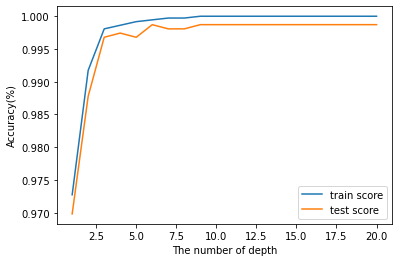

In [41]:
depth_min = 1
depth_max = 21
n_estimator =30
optimi_maxdepth (algorithm, algorithm_name, x_train, y_train, 
                     x_test, y_test, depth_min, depth_max, n_estimator)

In [42]:
# 해석
# 학습 데이터셋 기반 정확도와 테스트 데이터셋 기반 정확도 간의 차이가 적은 depth 선정
# 최대 깊이는 적을수록 과대적합 방지가 용이함
# 테스트 데이터셋에서 모델 성능이 증가하다가 감소하기 직전의 
# 최대 깊이를 최적의 파라미터로 선정  ===> n_depth = 6

In [43]:

#  3)모델 최적화 함수: 분리 노드의 최소 자료 수 선정

def optimi_minsplit (algorithm, algorithm_name, x_train, y_train,
                     x_test, y_test, n_split_min, n_split_max,
                     n_estimator, n_depth):
    train_score = []; test_score = []
    para_split = [n_split*2 for n_split in range(n_split_min, n_split_max)]
    for v_min_samples_split in para_split:
        # 의사결정나무 모델의 경우 트리 개수를 따로 설정하지 않기 때문에 RFC, GBC와 분리하여 모델링
        if algorithm == DTC:
            model = algorithm(min_samples_split = v_min_samples_split,
                              max_depth = n_depth,
                              random_state = 1234)
        else:
            model = algorithm(min_samples_split = v_min_samples_split,
                              n_estimators = n_estimator,
                              max_depth = n_depth,
                              random_state = 1234)
        model.fit(x_train, y_train)
        train_score.append(model.score(x_train, y_train))
        test_score.append(model.score(x_test, y_test))

    # 분리 노드의 최소 자료 수에 따른 모델 성능 저장
    df_score_n = pd.DataFrame({'min_samples_split': para_split, 
                               'TrainScore': train_score, 
                               'TestScore': test_score})
    # 분리 노드의 최소 자료 수에 따른 모델 성능 추이 시각화 함수 호출
    optimi_visualization(algorithm_name, para_split, train_score, 
              test_score, "The minimum number node", "min_samples_split")
    print(round(df_score_n, 4))

    min_samples_split  TrainScore  TestScore
0                   2      0.9994     0.9987
1                   4      0.9994     0.9987
2                   6      0.9994     0.9987
3                   8      0.9994     0.9981
4                  10      0.9994     0.9981
5                  12      0.9994     0.9987
6                  14      0.9994     0.9987
7                  16      0.9994     0.9987
8                  18      0.9994     0.9987
9                  20      0.9994     0.9987
10                 22      0.9994     0.9987
11                 24      0.9994     0.9987
12                 26      0.9994     0.9987
13                 28      0.9994     0.9987
14                 30      0.9992     0.9987
15                 32      0.9992     0.9987
16                 34      0.9992     0.9987
17                 36      0.9992     0.9981
18                 38      0.9992     0.9981
19                 40      0.9992     0.9987
20                 42      0.9992     0.9987
21        

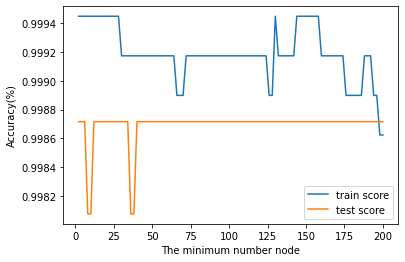

In [44]:
n_split_min = 1
n_split_max = 101
n_estimator = 30
n_depth = 6
pd.set_option('display.max_row', 100)
optimi_minsplit(algorithm, algorithm_name, x_train, y_train,
                     x_test, y_test, n_split_min, n_split_max,
                     n_estimator, n_depth)

In [45]:
# 해석
# 학습 데이터셋 기반 정확도와 테스트 데이터셋 기반 정확도 간의 차이가
# 적은 분리 노드의 최소 자료 수 선정  ===> n_split = 66

In [46]:
# 모델 최적화: (4) 잎사귀 노드의 최소 자료 수 선정
def optimi_minleaf(algorithm, algorithm_name, x_train, y_train, x_test,
                   y_test, n_leaf_min, n_leaf_max,
                   n_estimator, n_depth, n_split):
    train_score = []; test_score = []
    para_leaf = [n_leaf*2 for n_leaf in range(n_leaf_min, n_leaf_max)]

    for v_min_samples_leaf in para_leaf:
        # 의사결정나무 모델의 경우 트리 개수를 따로 설정하지 않기 때문에 RFC, GBC와 분리하여 모델링
        if algorithm == DTC:
            model = algorithm(min_samples_leaf = v_min_samples_leaf,
                                        max_depth = n_depth,
                                        min_samples_split = n_split,
                                        random_state=1234)
        else:
            model = algorithm(min_samples_leaf = v_min_samples_leaf,
                                n_estimators = n_estimator,
                                max_depth = n_depth,
                                min_samples_split = n_split,
                                random_state=1234)
        model.fit(x_train, y_train)
        train_score.append(model.score(x_train, y_train))
        test_score.append(model.score(x_test, y_test))

    # 잎사귀 노드의 최소 자료 수에 따른 모델 성능 저장
    df_score_n = pd.DataFrame({'min_samples_leaf': para_leaf,
                               'TrainScore': train_score, 
                               'TestScore': test_score})
    # 잎사귀 노드의 최소 자료 수에 따른 모델 성능 추이 시각화 함수 호출
    optimi_visualization(algorithm_name, para_leaf,
                         train_score, test_score, 
                         "The minimum number of samples required to be at a leaf node", "min_samples_leaf")
    print(round(df_score_n, 4))

    min_samples_leaf  TrainScore  TestScore
0                  2      0.9989     0.9987
1                  4      0.9986     0.9981
2                  6      0.9983     0.9981
3                  8      0.9983     0.9981
4                 10      0.9983     0.9974
5                 12      0.9986     0.9974
6                 14      0.9986     0.9974
7                 16      0.9986     0.9981
8                 18      0.9983     0.9981
9                 20      0.9983     0.9981
10                22      0.9975     0.9981
11                24      0.9972     0.9968
12                26      0.9972     0.9961
13                28      0.9970     0.9961
14                30      0.9967     0.9968
15                32      0.9967     0.9968
16                34      0.9967     0.9968
17                36      0.9964     0.9968
18                38      0.9961     0.9961
19                40      0.9964     0.9955
20                42      0.9964     0.9955
21                44      0.9964

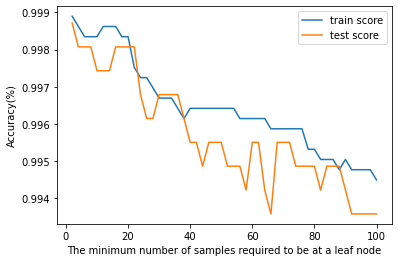

In [47]:
n_leaf_min = 1
n_leaf_max =  51
n_split = 66
optimi_minleaf(algorithm, algorithm_name, x_train, y_train, x_test,
                   y_test, n_leaf_min, n_leaf_max,
                   n_estimator, n_depth, n_split)

In [48]:
# 해석
# 학습 데이터셋 기반 정확도와 테스트 데이터셋 기반 정확도 간의 차이가 적은 잎사귀 노드의 최소 자료 수 선정
n_leaf = 20

In [49]:
import pickle
# 최종 모델 학습
def model_final(algorithm, algorithm_name, x_train, y_train, x_test,
                   y_test, n_leaf_min, n_leaf_max,
                   n_estimator, n_depth, n_split,n_leaf):

    # 의사결정나무 모델의 경우 트리 개수를 따로 설정하지 않기 때문에 RFC, GBC와 분리하여 모델링
    if algorithm == DTC:
        model = algorithm(random_state=1234, 
                          min_samples_leaf = n_leaf,
                          min_samples_split = n_split, 
                          max_depth = n_depth)
    else:
        model = algorithm(random_state = 1234, 
                          n_estimators = n_estimator, 
                          min_samples_leaf = n_leaf,
                          min_samples_split = n_split, 
                          max_depth = n_depth)
    model.fit(x_train, y_train)
    model_path = './model/'
    model_filename = 'wine_classification_'+algorithm_name+'.pkl'
    with open(model_path+model_filename,'wb') as f:
        pickle.dump(model,f)
    print(f'최종 모델 저장 완료! 파일 경로:{model_path+model_filename}\n')
    train_acc = model.score(x_train,y_train)
    test_acc = model.score(x_test,y_test)
    y_pred = model.predict(x_test)
    
    #혼동 행렬 시각화
    plt.figure(figsize = (30,30))
    plot_confusion_matrix(model,x_test,y_test,include_values=True,display_labels=['Red','White'],cmap='Pastel1')
    plt.savefig('./figure/'+algorithm_name+'_confusion_matrix.png')
    plt.show()
    
    #변수 중요도 산출
    dt_importance = pd.DataFrame()
    dt_importance['Feature'] = feature_name
    dt_importance['Importance'] = model.feature_importances_
    
    dt_importance.sort_values('Importance',ascending=False,inplace=True)
    print(dt_importance.round(3))
    
    dt_importance.sort_values('Importance',ascending=True,inplace=True)
    coordinates = range(len(dt_importance))
    plt.barh(y=coordinates,width=dt_importance['Importance'])
    plt.yticks(coordinates,dt_importance['Feature'])
    plt.xlabel('Feature Importance')
    plt.ylabel('Features')
    plt.savefig('./figure/' + algorithm_name + '_feature_importance.png')
                          

최종 모델 저장 완료! 파일 경로:./model/wine_classification_rfc.pkl



C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 2160x2160 with 0 Axes>

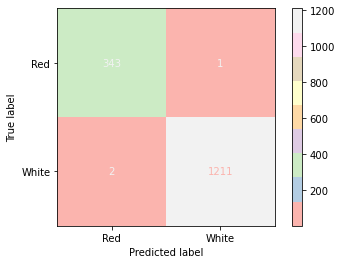

                 Feature  Importance
1              chlorides       0.308
9   total sulfur dioxide       0.270
10      volatile acidity       0.158
7         residual sugar       0.092
3                density       0.080
4          fixed acidity       0.041
5    free sulfur dioxide       0.027
8              sulphates       0.014
6                     pH       0.004
2            citric acid       0.004
0                alcohol       0.000


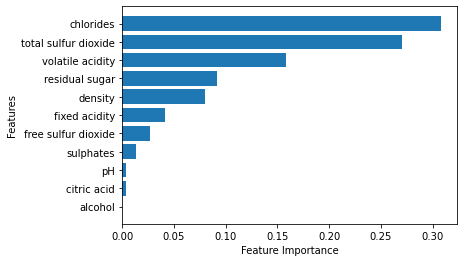

In [50]:
model_final(algorithm, algorithm_name, x_train, y_train, x_test,
                   y_test, n_leaf_min, n_leaf_max,
                   n_estimator, n_depth, n_split,n_leaf)

In [51]:
# 해석
# 최종 학습한 모델의 정확도가 99.8%
# F1 점수 역시 0.999인 만큼 분류 성능이 우수한 것을 알 수 있음
# 번수별 중요도 산출 결과,chlorides(염화물),total sulfur dioxide(총 이산화항),volatile acidity(휘발성산),density(밀도)가 
# 와인 분류에 있어 가장 중요 4가지 변수임

In [52]:
algorithm =GBC 
algorithm_name ='bgc'

In [53]:
train_acc_before,test_acc_before = modeling_uncustomized(algorithm,x_train,y_train,x_test,y_test)

학습 데이터셋 정확도 : 1.0
test 데이터셋 정확도 : 0.999


    depth  TrainScore  TestScore
0       1      0.9871     0.9846
1       2      0.9972     0.9949
2       3      0.9989     0.9968
3       4      0.9997     0.9981
4       5      1.0000     0.9987
5       6      1.0000     0.9987
6       7      1.0000     0.9974
7       8      1.0000     0.9987
8       9      1.0000     0.9987
9      10      1.0000     0.9974
10     11      1.0000     0.9974
11     12      1.0000     0.9974
12     13      1.0000     0.9974
13     14      1.0000     0.9974
14     15      1.0000     0.9974
15     16      1.0000     0.9974
16     17      1.0000     0.9974
17     18      1.0000     0.9974
18     19      1.0000     0.9974
19     20      1.0000     0.9974


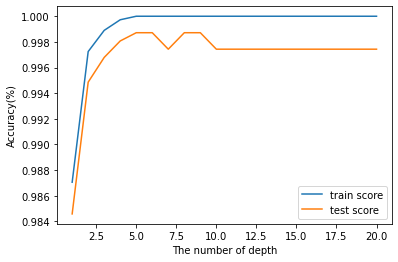

In [54]:
depth_min = 1
depth_max = 21
n_estimator =30
optimi_maxdepth (algorithm, algorithm_name, x_train, y_train, 
                     x_test, y_test, depth_min, depth_max, n_estimator)

    min_samples_split  TrainScore  TestScore
0                   2      1.0000     0.9987
1                   4      1.0000     0.9981
2                   6      1.0000     0.9981
3                   8      1.0000     0.9981
4                  10      1.0000     0.9981
5                  12      1.0000     0.9981
6                  14      1.0000     0.9981
7                  16      1.0000     0.9981
8                  18      1.0000     0.9981
9                  20      1.0000     0.9981
10                 22      1.0000     0.9981
11                 24      1.0000     0.9981
12                 26      1.0000     0.9981
13                 28      1.0000     0.9981
14                 30      1.0000     0.9981
15                 32      1.0000     0.9981
16                 34      1.0000     0.9981
17                 36      1.0000     0.9981
18                 38      1.0000     0.9981
19                 40      1.0000     0.9981
20                 42      1.0000     0.9981
21        

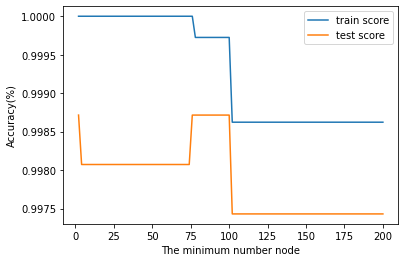

In [55]:
n_split_min = 1
n_split_max = 101
n_estimator = 30
n_depth = 6
pd.set_option('display.max_row', 100)
optimi_minsplit(algorithm, algorithm_name, x_train, y_train,
                     x_test, y_test, n_split_min, n_split_max,
                     n_estimator, n_depth)

In [56]:
algorithm =DTC
algorithm_name ='dtc'

In [57]:
train_acc_before,test_acc_before = modeling_uncustomized(algorithm,x_train,y_train,x_test,y_test)

학습 데이터셋 정확도 : 1.0
test 데이터셋 정확도 : 0.999


    depth  TrainScore  TestScore
0       1      0.9576     0.9448
1       2      0.9871     0.9852
2       3      0.9948     0.9936
3       4      0.9972     0.9961
4       5      0.9975     0.9968
5       6      0.9981     0.9968
6       7      0.9986     0.9968
7       8      0.9986     0.9968
8       9      0.9992     0.9961
9      10      1.0000     0.9974
10     11      1.0000     0.9974
11     12      1.0000     0.9974
12     13      1.0000     0.9974
13     14      1.0000     0.9974
14     15      1.0000     0.9974
15     16      1.0000     0.9974
16     17      1.0000     0.9974
17     18      1.0000     0.9974
18     19      1.0000     0.9974
19     20      1.0000     0.9974


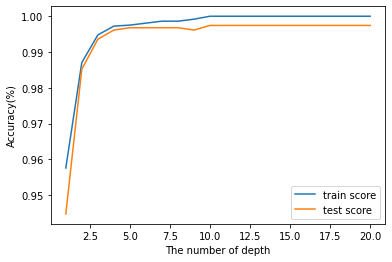

In [58]:
depth_min = 1
depth_max = 21
n_estimator =50
optimi_maxdepth (algorithm, algorithm_name, x_train, y_train, 
                     x_test, y_test, depth_min, depth_max, n_estimator)